In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv')                   

In [48]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\n prices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
 prices df shape: (7914, 1241)


In [49]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [50]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [51]:
prices.columns

Index(['905270', '921795', '904261', '905261', '916328', '923024', '936365',
       '902355', '912215', '929813',
       ...
       '9889RL', '69568X', '543755', '77463M', '29235J', '131745', '69487D',
       '68157P', '9110RA', '292703'],
      dtype='object', length=1241)

In [52]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Data frame to hold returns
daily_r = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_r.columns:
    daily_r[col] = daily_r[col].pct_change()*100

In [54]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
daily_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Resample to weekly
weekly_r = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_r.columns:
    weekly_r[col] = weekly_r[col].pct_change()*100

In [57]:
weekly_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Running linear regression on a sample stock
import datetime as dt

weekly_no_index = weekly_r.reset_index()
weekly_no_index["date"] = weekly_no_index.date.map(dt.datetime.toordinal)

weekly_no_index[["date", "936365"]]

,date,936365
0,726474,NaN
1,726481,-3.622047
2,726488,-0.980392
3,726495,-0.990099
4,726502,-3.666667
...,...,...
1634,737912,4.051410
1635,737919,-6.778209
1636,737926,-4.225280
1637,737933,1.442128


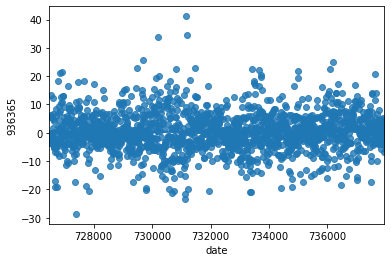

In [59]:
sns.regplot(data=weekly_no_index, x="date", y="936365")

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_df = weekly_no_index[~weekly_no_index["936365"].isna()]
model.fit(X=new_df[["date"]], y=new_df["936365"])

LinearRegression()

In [61]:
print("Line formula for 936365: \nreturn = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * date")

Line formula for 936365: 
return = -21.846821045157913 + 3.0427665472240984e-05 * date


In [62]:
model.predict(pd.DataFrame([[737947]]))[0]

0.6071834070859055

In [63]:
predictions = {}

def linear_predict(stock):
    new_df = weekly_no_index[["date", stock]]
    new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_df = new_df[~new_df[stock].isna()]
    if new_df.shape[0] != 0:
        model.fit(X=new_df[["date"]], y=new_df[stock])
        print("Line formula for " + stock + ": \n\treturn = " + str(model.intercept_) + " + " +
              str(model.coef_[0]) + " * date")
        predictions[stock] = model.predict(pd.DataFrame([[737969]]))[0]

In [64]:
current_stocks = weekly_no_index.columns[weekly_no_index.iloc[-1] != 0][1:]

for stock in current_stocks:
    linear_predict(stock)

Line formula for 916328: 
	return = 1.8237969622087267 + -2.160673182118806e-06 * date
Line formula for 936365: 
	return = -21.846821045157913 + 3.0427665472240984e-05 * date
Line formula for 905271: 
	return = -1.194664876694092 + 1.963034096719461e-06 * date
Line formula for 905113: 
	return = -2.3372183214951407 + 3.3925288405958527e-06 * date
Line formula for 905802: 
	return = -12.143692416806738 + 1.683760005030197e-05 * date
Line formula for 905425: 
	return = -9.887413035642494 + 1.3627548445046124e-05 * date
Line formula for 906156: 
	return = -3.6761854967453527 + 5.356033827743527e-06 * date
Line formula for 916305: 
	return = 21.276949212950203 + -2.884751684495059e-05 * date
Line formula for 992816: 
	return = -32.16821645076743 + 4.4601361657954156e-05 * date
Line formula for 921093: 
	return = -3.769930158561297 + 5.384172665131421e-06 * date
Line formula for 905342: 
	return = -23.514241005923505 + 3.236074928593885e-05 * date
Line formula for 702259: 
	return = -18.477

Line formula for 906187: 
	return = 15.297722013292276 + -2.0683291703676305e-05 * date
Line formula for 905050: 
	return = -4.86075541125715 + 6.8399125853170645e-06 * date
Line formula for 904069: 
	return = -8.925380613628192 + 1.235475235161747e-05 * date
Line formula for 912212: 
	return = 15.990823639951204 + -2.154538601841276e-05 * date
Line formula for 729935: 
	return = -11.341599741402955 + 1.5858416453882765e-05 * date
Line formula for 905922: 
	return = 13.036957964608847 + -1.765590977028706e-05 * date
Line formula for 902354: 
	return = 10.338140956696506 + -1.3914876107251182e-05 * date
Line formula for 912134: 
	return = 11.784212903796409 + -1.577331133997624e-05 * date
Line formula for 921290: 
	return = -6.3673199648348024 + 8.961880525176994e-06 * date
Line formula for 937343: 
	return = -12.911030412936979 + 1.795434862910603e-05 * date
Line formula for 912402: 
	return = -7.193777732119332 + 1.0114445154761382e-05 * date
Line formula for 929799: 
	return = -35.34

Line formula for 902272: 
	return = -31.13878113445541 + 4.273545105787601e-05 * date
Line formula for 944345: 
	return = -14.807795463982284 + 2.0493967836503268e-05 * date
Line formula for 905010: 
	return = -16.545800495112836 + 2.275389836982385e-05 * date
Line formula for 905284: 
	return = 15.492774014241283 + -2.1016622626362618e-05 * date
Line formula for 905368: 
	return = 10.009319029328342 + -1.384149518288067e-05 * date
Line formula for 921264: 
	return = -8.18032432108488 + 1.1494573154827846e-05 * date
Line formula for 544682: 
	return = -6.0772967600409045 + 8.446659213434403e-06 * date
Line formula for 544683: 
	return = -10.425277506916926 + 1.4467492572156795e-05 * date
Line formula for 938692: 
	return = 51.368849553803294 + -6.961893370398087e-05 * date
Line formula for 777771: 
	return = -15.170210241266505 + 2.1341172055937644e-05 * date
Line formula for 923465: 
	return = 2.694034128430663 + -3.419030357887403e-06 * date
Line formula for 327998: 
	return = 14.668

Line formula for 271980: 
	return = 25.181364039683448 + -3.412238859605089e-05 * date
Line formula for 916532: 
	return = 42.70651318474208 + -5.798371373073717e-05 * date
Line formula for 500373: 
	return = 7.833775140425464 + -1.0295979594093012e-05 * date
Line formula for 906176: 
	return = -1.6938635472195238 + 2.511993272091477e-06 * date
Line formula for 545088: 
	return = 153.16991549038897 + -0.00020956969823925732 * date
Line formula for 255272: 
	return = 75.00003863774491 + -0.00010193032877250295 * date
Line formula for 328184: 
	return = 18.282223532397165 + -2.431060485229944e-05 * date
Line formula for 286738: 
	return = 26.62106034485807 + -3.593891275914975e-05 * date
Line formula for 923649: 
	return = 25.220843601192918 + -3.398153170655402e-05 * date
Line formula for 981722: 
	return = 23.784404639273298 + -3.1978593849042374e-05 * date
Line formula for 328576: 
	return = 64.9674325623715 + -8.800228036681985e-05 * date
Line formula for 944777: 
	return = -3.939017

Line formula for 912441: 
	return = -0.15267253476510706 + 4.242152604153058e-07 * date
Line formula for 883626: 
	return = 75.80176297210936 + -0.00010287450951948297 * date
Line formula for 26406N: 
	return = 89.52847703312734 + -0.00012131821458726604 * date
Line formula for 904390: 
	return = 4.434341072722759 + -5.810480260647348e-06 * date
Line formula for 683432: 
	return = -20.105668718118668 + 2.7693204914420282e-05 * date
Line formula for 982579: 
	return = -1.8753183556065687 + 2.756064352365701e-06 * date
Line formula for 894720: 
	return = 22.266848994673914 + -3.0046919147771068e-05 * date
Line formula for 921051: 
	return = -6.48743405947964 + 9.158105285840646e-06 * date
Line formula for 921999: 
	return = -18.71542449664558 + 2.57106583102266e-05 * date
Line formula for 328595: 
	return = 4.510929926038807 + -5.563929248791444e-06 * date
Line formula for 500344: 
	return = 43.95347629821245 + -5.9580599620046326e-05 * date
Line formula for 545004: 
	return = 58.1271072

Line formula for 14863U: 
	return = 29.941194044249308 + -4.0089061269554394e-05 * date
Line formula for 51922M: 
	return = -29.551745359128677 + 4.0607183101548476e-05 * date
Line formula for 13471D: 
	return = 4.609518733382663 + -5.723160013374837e-06 * date
Line formula for 50806E: 
	return = -4.072547457768853 + 6.183911337767823e-06 * date
Line formula for 7025QJ: 
	return = -766.59301740731 + 0.0010399992109379453 * date
Line formula for 921794: 
	return = -23.28988901380305 + 3.217693903822356e-05 * date
Line formula for 756957: 
	return = -10.440821475538023 + 1.4574730346566439e-05 * date
Line formula for 14846V: 
	return = 30.91765862063318 + -4.1614356427216875e-05 * date
Line formula for 27338P: 
	return = 54.026177034224695 + -7.293823526125003e-05 * date
Line formula for 29304L: 
	return = 62.66778259573999 + -8.480856426577148e-05 * date
Line formula for 32593H: 
	return = 7.119804096442817 + -9.027301837151358e-06 * date
Line formula for 77597H: 
	return = 116.80136736

Line formula for 311917: 
	return = 20.838730172516506 + -2.770456221938035e-05 * date
Line formula for 9660J1: 
	return = -6829.272110754244 + 0.009256226911208353 * date
Line formula for 69568X: 
	return = -183.6574057026593 + 0.00025102925188098536 * date
Line formula for 543755: 
	return = -4.369583006568905 + 6.488326632783506e-06 * date
Line formula for 77463M: 
	return = -835.8998362120193 + 0.001136839906285804 * date
Line formula for 29235J: 
	return = -46.134756896249144 + 6.350173010556214e-05 * date
Line formula for 131745: 
	return = -6.832042022228627 + 1.0193610260546924e-05 * date
Line formula for 69487D: 
	return = 79.81255181264177 + -0.00010764812799009184 * date
Line formula for 68157P: 
	return = -145.68335880566772 + 0.00019882347500479173 * date
Line formula for 9110RA: 
	return = -203.75991825637016 + 0.00027831009879800334 * date
Line formula for 292703: 
	return = -39.44781967242175 + 5.417648302215428e-05 * date


In [85]:
# Ordered list of stocks and their predicted returns
sorted_values = sorted(predictions.values(), reverse=True)

sorted_dict = {}
for i in sorted_values:
    for k in predictions.keys():
        if predictions[k] == i:
            sorted_dict[k] = predictions[k]
            break

count = 1
for stock in sorted_dict:
    stock_name = info.loc[info.Instrument == stock, "NAME"].values[0]
    if "DELIST" in stock_name:
        continue
    print(str(count) + ". " + stock_name + ": " + str(sorted_dict[stock]))
    count += 1

1. ENPHASE ENERGY: 3.0527725898091376
2. GAMESTOP 'A': 2.473489697285231
3. ETSY: 2.361854999513639
4. CAESARS ENTERTAINMENT: 1.6243070434935873
5. TESLA: 1.5944002786995952
6. ADIENT: 1.554214539173472
7. VONTIER: 1.5364066832735261
8. DOW ORD SHS: 1.3991023304372447
9. CORTEVA: 1.3760758442565475
10. BRIGHTHOUSE FINANCIAL: 1.2560972450362442
11. FOX A: 1.1357422114494966
12. PAYPAL HOLDINGS: 1.1351158839930235
13. FOX B: 1.0880348295534077
14. GENERAC HOLDINGS: 1.0422022201434231
15. DEXCOM: 1.0328113467536326
16. TWITTER: 1.0045799046224602
17. ALIGN TECHNOLOGY: 0.9891612420323668
18. UNDER ARMOUR 'C': 0.8941602893545451
19. MSCI: 0.8443145653066324
20. MARKETAXESS HOLDINGS: 0.8388926862905492
21. T-MOBILE US: 0.8262096760937254
22. FORTINET: 0.8147710834676616
23. KEYSIGHT TECHNOLOGIES: 0.8014106168086244
24. CATALENT: 0.7779503111995041
25. ALPHABET 'C': 0.776563074535801
26. APPLE: 0.7462058105913414
27. OLD DOMINION FGT.LINES: 0.7445898090188408
28. NETFLIX: 0.740651986999616
29

602. KOHL'S: -0.09734922349556285
603. PATTERSON COMPANIES: -0.09782172464662864
604. PITNEY-BOWES: -0.09836241423008829
605. VIATRIS: -0.10235724486780384
606. FIRST SOLAR: -0.10590078089370536
607. ADTALEM GLOBAL EDUCATION: -0.11108867236641373
608. NIELSEN: -0.11270210390455304
609. NETAPP: -0.1148346054170446
610. STERICYCLE: -0.11643594347395947
611. CITRIX SYS.: -0.11782580918982433
612. GENERAL ELECTRIC: -0.12060779344601613
613. PHILLIPS 66: -0.12527907555994489
614. VIAVI SOLUTIONS: -0.12643769060764498
615. DISH NETWORK 'A': -0.14826063373455156
616. LUMEN TECHNOLOGIES: -0.15415182006383432
617. JUNIPER NETWORKS: -0.15994630082053618
618. EBAY: -0.16874015920842567
619. BED BATH & BEYOND: -0.16960904951359623
620. TAPESTRY: -0.17840363770478973
621. ENDO INTERNATIONAL: -0.20215864210966572
622. YELLOW: -0.20527532928692338
623. AMERICAN AIRLINES GROUP: -0.20927215843161662
624. FLUOR: -0.22138415617031626
625. CISCO SYSTEMS: -0.23941909835875208
626. TRANSOCEAN: -0.2697525134